In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

In [136]:
file = "dataset.csv"
dataset = pd.read_csv(file)
df = dataset.drop(['id', 'amsp'], axis=1)
print(df.head())

   age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   18     1    1    120     1    0      56       3     0    88        62   
1   26     4    1      1     1    0      20       4     0   109        55   
2   21     3    2      1     0    0      36       3     0   106        64   
3   21     2    2      1     0    1      51       5     0   101        52   
4   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27   0.738095    34      61      17      13      20  
1        37   0.690476     7      33      14      11      26  
2        39   0.690476    25      73      24       7      23  
3        33   0.833333    17      48      16      10      21  
4        28   0.690476    14      46      22      14      23  


In [103]:
variables_objectiu = df[['cesd', 'stai_t', 'mbi_ex', 'mbi_cy']]

df_cat_order = df[['year', 'stud_h', 'health']]
df_cat_norder = df[['glang','sex']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'mbi_cy', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
df_bin = df[['part', 'job', 'psyt']]

# df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean']]

vars_categoriques = ['year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']
vars_num = ['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']
vars_bin = ['part', 'job', 'psyt']



In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_cat_order_c = df_cat_order.copy()
df_cat_norder_c = df_cat_norder.copy()
df_num_c = df_num.copy()
df_bin_c = df_bin.copy()

df_cat_norder_encoded = pd.get_dummies(df_cat_norder_c, columns=['glang', 'sex'], prefix=['glang', 'sex'])
scaler = StandardScaler()
# scaler2 = MinMaxScaler()
scaler2 = StandardScaler()

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_c), columns=df_num_c.columns)
df_cat_order_scaled = pd.DataFrame(scaler2.fit_transform(df_cat_order_c), columns=df_cat_order_c.columns)


df_final = pd.concat([df_cat_order_scaled, df_cat_norder_encoded, df_num_scaled, df_bin_c], axis=1)
print(df_final.head())

pd.set_option('display.max_columns', None)


bool_columns = df_final.select_dtypes(include='bool').columns

for col in bool_columns:
    df_final[col] = df_final[col].astype(int)

df_final.head()

columnas_string = ", ".join([f"'{col}'" for col in df_final.columns])
print(columnas_string)

# pd.reset_option('display.max_columns')

       year    stud_h    health  glang_1  glang_15  glang_20  glang_37  \
0 -1.192728  1.929222 -0.733013        0         0         0         0   
1  0.508974 -0.332243  0.209584        1         0         0         0   
2 -0.058260  0.672852 -0.733013        1         0         0         0   
3 -0.625494  1.615130  1.152182        1         0         0         0   
4 -0.058260 -0.206606  0.209584        1         0         0         0   

   glang_54  glang_60  glang_63  glang_90  glang_92  glang_95  glang_98  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   glang_102  glang_104  glang_106  glang_108  glang_114  glang_118  \
0          0          0          

In [105]:
x1 = df_final[['year', 'stud_h', 'health', 
        'glang_1', 'glang_15', 'glang_20', 'glang_37', 'glang_54', 'glang_60', 
        'glang_63', 'glang_90', 'glang_92', 'glang_95', 'glang_98', 'glang_102', 
        'glang_104', 'glang_106', 'glang_108', 'glang_114', 'glang_118', 'glang_120', 
        'glang_121', 'sex_1', 'sex_2', 'sex_3', 'age', 'jspe', 'qcae_cog', 'qcae_aff', 
        'erec_mean', 'mbi_ea', 'part', 'job', 'psyt'
        ]]

x2 = df_final[['year', 'stud_h', 'health', 'sex_1', 'sex_2', 'sex_3', 'age', 
               'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'mbi_ea', 'part', 
               'job', 'psyt'
        ]]

y = df_final[['cesd']]

In [91]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Ejemplo de un dataset
# df = pd.DataFrame({
#     'age': [25, 30, 22, 40, 35],
#     'sex': ['male', 'female', 'female', 'male', 'male'],
#     'sueldo': [30000, 40000, 25000, 50000, 45000],
#     'job': ['yes', 'no', 'yes', 'no', 'yes'],
#     'cesd': [20.5, 15.3, 25.7, 10.2, 18.1]  # Variable continua objetivo
# })

# # Separar las variables predictoras (X) y la variable objetivo (y)
# X = df[['age', 'sex', 'sueldo', 'job']]  # Variables predictoras
# y = df['cesd']  # Variable continua objetivo

# # Dividir el dataset en conjunto de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Crear el preprocesador que realiza la transformación de variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['age', 'sueldo']),  # Escalar variables numéricas
#         ('cat', OneHotEncoder(), ['sex', 'job'])       # Codificar variables categóricas
#     ])

# # Crear el pipeline con el preprocesador y el modelo de regresión lineal
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())  # Modelo de regresión lineal
# ])

# # Entrenar el modelo
# model.fit(X_train, y_train)

# # Obtener los coeficientes de las variables
# coefficients = model.named_steps['regressor'].coef_

# # Obtener el nombre de las características después de la codificación
# encoded_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['sex', 'job'])
# all_features = np.concatenate([['age', 'sueldo'], encoded_features])

# # Crear un DataFrame para visualizar los coeficientes y su importancia
# importance_df = pd.DataFrame({
#     'Feature': all_features,
#     'Coefficient': coefficients
# })

# # Ordenar por los coeficientes más importantes
# importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
# importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# print(importance_df)


      Feature  Coefficient  Absolute Coefficient
4      job_no    -3.414950              3.414950
5     job_yes     3.414950              3.414950
2  sex_female     2.227010              2.227010
3    sex_male    -2.227010              2.227010
0         age    -1.182598              1.182598
1      sueldo    -0.535588              0.535588


Error cuadrático medio (MSE): 0.6716916208746262
Coeficiente de determinación (R²): 0.3779691245664354


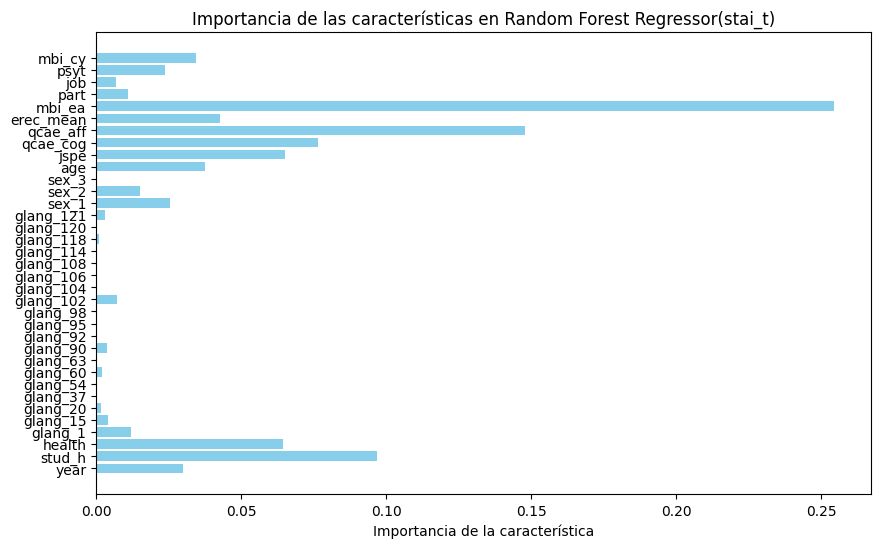

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

variables_objectiu = df_final[['cesd', 'stai_t', 'mbi_ex', 'mbi_cy']]

x1 = df_final[['year', 'stud_h', 'health', 
        'glang_1', 'glang_15', 'glang_20', 'glang_37', 'glang_54', 'glang_60', 
        'glang_63', 'glang_90', 'glang_92', 'glang_95', 'glang_98', 'glang_102', 
        'glang_104', 'glang_106', 'glang_108', 'glang_114', 'glang_118', 'glang_120', 
        'glang_121', 'sex_1', 'sex_2', 'sex_3', 'age', 'jspe', 'qcae_cog', 'qcae_aff', 
        'erec_mean', 'mbi_ea', 'part', 'job', 'psyt', 'mbi_cy',
        ]]

x2 = df_final[['year', 'stud_h', 'health', 'sex_1', 'sex_2', 'sex_3', 'age', 
               'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'mbi_ea', 'part', 
               'job', 'psyt', 'mbi_cy'
        ]]

x3 = df_final[['stud_h', 'health', 'age', 'jspe', 'qcae_cog', 
               'qcae_aff', 'erec_mean', 'mbi_ea', 'psyt', 'mbi_cy'
        ]]

x4 = df_final[['stud_h', 'qcae_aff', 'mbi_ea', 'mbi_cy']]

y = df_final[['stai_t']]



# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train.values.ravel())  # .values.ravel() para convertir a 1D si es necesario

# Predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

# Obtener las importancias de las características
importances = rf.feature_importances_
feature_names = x1.columns

# Crear un gráfico de barras para visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en Random Forest Regressor(stai_t)')
plt.show()


Error cuadrático medio (MSE): 0.6617994434997242
Coeficiente de determinación (R²): 0.38712993521409855


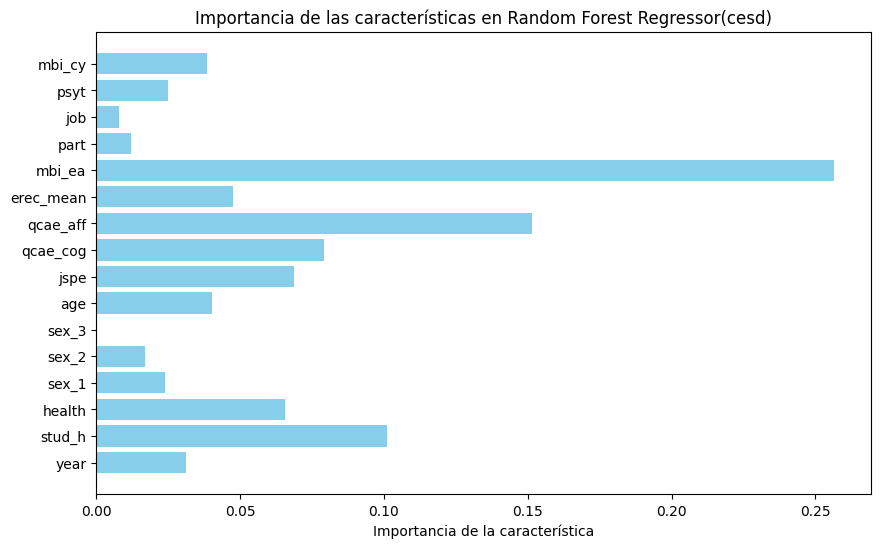

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

variables_objectiu = df_final[['cesd', 'stai_t', 'mbi_ex', 'mbi_cy']]

x2 = df_final[['year', 'stud_h', 'health', 'sex_1', 'sex_2', 'sex_3', 'age', 
               'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'mbi_ea', 'part', 
               'job', 'psyt', 'mbi_cy'
        ]]

y = df_final[['stai_t']]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train.values.ravel())  # .values.ravel() para convertir a 1D si es necesario

# Predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

# Obtener las importancias de las características
importances = rf.feature_importances_
feature_names = x2.columns

# Crear un gráfico de barras para visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en Random Forest Regressor(cesd)')
plt.show()


Error cuadrático medio (MSE): 0.7218417336645807
Coeficiente de determinación (R²): 0.3315268025359659


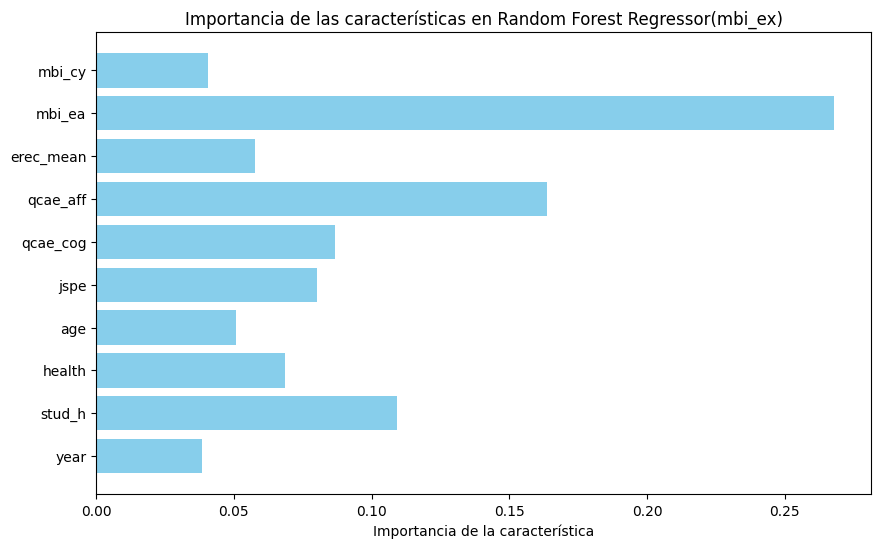

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

variables_objectiu = df_final[['cesd', 'stai_t', 'mbi_ex', 'mbi_cy']]

x3 = df_final[['year', 'stud_h', 'health', 'age', 
               'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'mbi_ea', 'mbi_cy'
        ]]

y = df_final[['stai_t']]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train.values.ravel())  # .values.ravel() para convertir a 1D si es necesario

# Predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

# Obtener las importancias de las características
importances = rf.feature_importances_
feature_names = x3.columns

# Crear un gráfico de barras para visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en Random Forest Regressor(mbi_ex)')
plt.show()


Millor k silhouette: 3


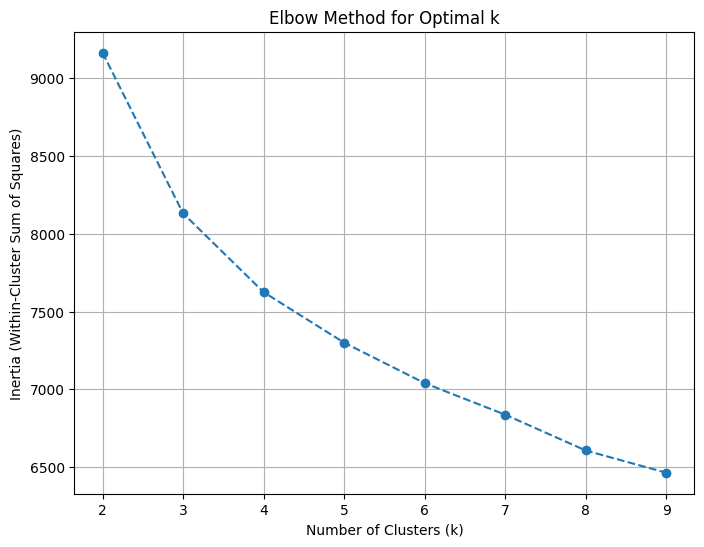

       year    stud_h    health  sex_1  sex_2  sex_3       age      jspe  \
0 -1.192728  1.929222 -0.733013      1      0      0 -1.328891 -2.093018   
1  0.508974 -0.332243  0.209584      1      0      0  1.096233  0.299039   
2 -0.058260  0.672852 -0.733013      0      1      0 -0.419470 -0.042683   
3 -0.625494  1.615130  1.152182      0      1      0 -0.419470 -0.612221   
4 -0.058260 -0.206606  0.209584      1      0      0 -0.419470 -0.498313   

   qcae_cog  qcae_aff  erec_mean    mbi_ea  part  job  psyt    mbi_cy  \
0  0.529045 -1.448527   0.191956 -0.908577     1    0     0  0.636380   
1 -0.536951  0.412275  -0.317245  0.387023     1    0     0  0.200651   
2  0.833615  0.784435  -0.317245 -0.260777     0    0     0 -0.670805   
3 -0.993806 -0.332046   1.210356 -0.692644     0    1     0 -0.017213   
4 -0.080096 -1.262447  -0.317245 -0.260777     1    0     0  0.854244   

     mbi_cy  
0  0.636380  
1  0.200651  
2 -0.670805  
3 -0.017213  
4  0.854244  


In [140]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans(dfs, max_k=10):
    df_t = dfs.copy()

    # Store inertia values and clustering results for plotting
    inertia = []
    clusterings = []

    sil_best_score = -1
    sil_best_k = 2

    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = model.fit_predict(df_t)
        
        # Silhouette
        if k > 2:
            score = silhouette_score(df_t, clusters)
            if score > sil_best_score:
                sil_best_score = score
                sil_best_k = k
            ##


        inertia.append(model.inertia_)
        cluster_centers = model.cluster_centers_
        clusterings.append((k, clusters, cluster_centers))

    # Silhouette 
    print("Millor k silhouette:", sil_best_k)

    # Plot clustering results for each k, 2 plots per row
    num_plots = len(clusterings)
    num_cols = 2

    plt.figure(figsize=(8, 6))
    k_values = range(2, max_k + 1)
    plt.plot(k_values, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()
    
    return clusterings
    

c = kmeans(x2, 9)
print(x2.head())



In [137]:
x2.shape, df_final.shape, df.shape

((886, 17), (886, 39), (886, 18))

In [127]:

print(x2.head())
print(df.head())
print(df_final.head())


#NORMALITZACIÓ MIN-MAX
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  

       year    stud_h    health  sex_1  sex_2  sex_3       age      jspe  \
0 -1.192728  1.929222 -0.733013      1      0      0 -1.328891 -2.093018   
1  0.508974 -0.332243  0.209584      1      0      0  1.096233  0.299039   
2 -0.058260  0.672852 -0.733013      0      1      0 -0.419470 -0.042683   
3 -0.625494  1.615130  1.152182      0      1      0 -0.419470 -0.612221   
4 -0.058260 -0.206606  0.209584      1      0      0 -0.419470 -0.498313   

   qcae_cog  qcae_aff  erec_mean    mbi_ea  part  job  psyt    mbi_cy  \
0  0.529045 -1.448527   0.191956 -0.908577     1    0     0  0.636380   
1 -0.536951  0.412275  -0.317245  0.387023     1    0     0  0.200651   
2  0.833615  0.784435  -0.317245 -0.260777     0    0     0 -0.670805   
3 -0.993806 -0.332046   1.210356 -0.692644     0    1     0 -0.017213   
4 -0.080096 -1.262447  -0.317245 -0.260777     1    0     0  0.854244   

     mbi_cy  
0  0.636380  
1  0.200651  
2 -0.670805  
3 -0.017213  
4  0.854244  
   age  year  sex  g

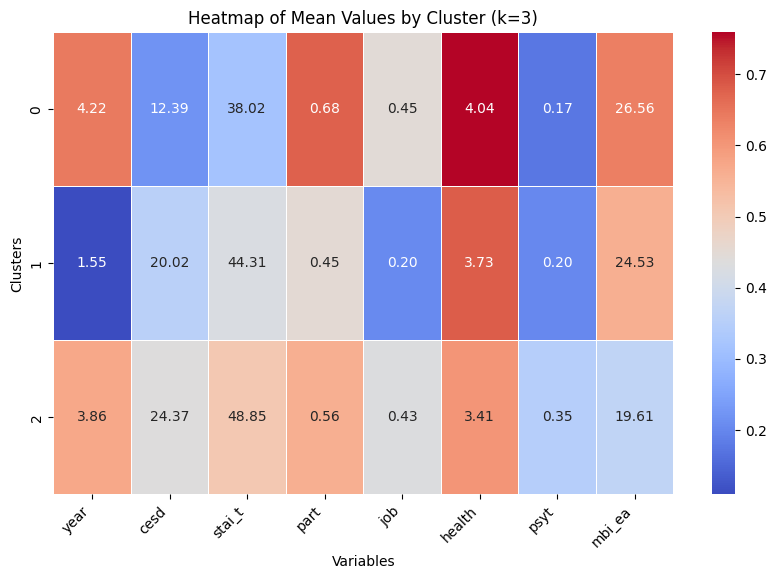

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster2(df_original, df_normalized, clusters, variables, k_def):
    # Afegir els labels dels clústers al DataFrame normalitzat
    df_norm_copy = df_normalized.copy()
    df_orig_copy = df_original.copy()
    
    # Assignar els clústers al DataFrame original i normalitzat
    for k, cluster_labels, _ in clusters:
        if k == k_def:
            df_norm_copy['Cluster'] = cluster_labels
            df_orig_copy['Cluster'] = cluster_labels
            break

    # Calcular la mitjana de les variables normals per clúster
    mean_values_real = df_orig_copy.groupby('Cluster')[variables].mean()

    # Calcular la mitjana de les variables normalitzades per clúster
    mean_values_norm = df_norm_copy.groupby('Cluster')[variables].mean()

    # Fer el heatmap utilitzant els valors normalitzats però mostrant els valors reals
    plt.figure(figsize=(10, 6))
    sns.heatmap(mean_values_norm, annot=mean_values_real, cmap='coolwarm', linewidths=0.5, fmt='.2f')

    plt.title(f'Heatmap of Mean Values by Cluster (k={k_def})')
    plt.xlabel('Variables')
    plt.ylabel('Clusters')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_cluster2(df, df_min_max_scaled, c, ['year', 'cesd', 'stai_t', 'part', 'job', 'health', 'psyt', 'mbi_ea'], 3)
#plot_cluster2(df, df_max_scaled, c2, ['sex', 'year', 'cesd', 'stai_t', 'part', 'job', 'health', 'psyt', 'mbi_ea'], 5)
#plot_cluster2(df, df_max_scaled, c3, ['sex', 'year', 'cesd', 'stai_t', 'part', 'job', 'health', 'psyt', 'mbi_ea'], 5)


Best k according to BIC: 5


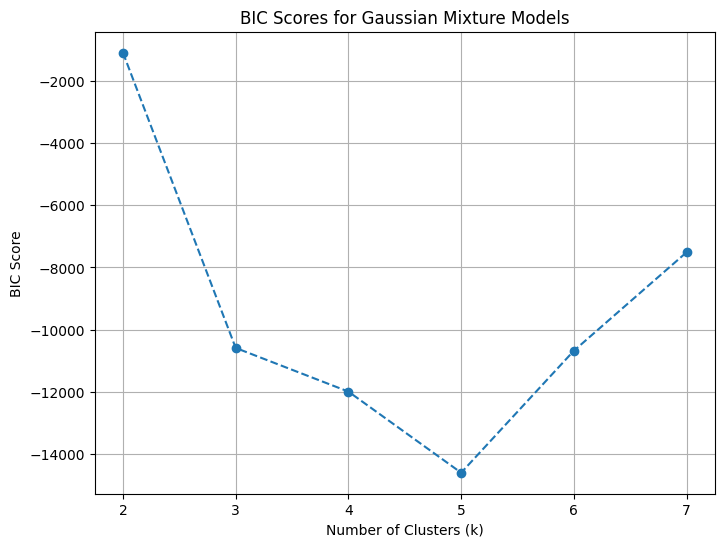

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

def gmm(dfs, max_k=10):
    df_t = dfs.copy()

    bic_scores = []
    clusterings = []

    best_bic = float('inf')
    best_k = 2

    for k in range(2, max_k + 1):
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
        gmm.fit(df_t)
        bic = gmm.bic(df_t)
        bic_scores.append(bic)

        clusters = gmm.predict(df_t)

        if bic < best_bic:
            best_bic = bic
            best_k = k
        
        cluster_centers = gmm.means_
        clusterings.append((k, clusters, cluster_centers))
    
    print(f"Best k according to BIC: {best_k}")

    plt.figure(figsize=(8, 6))
    k_values = range(2, max_k + 1)
    plt.plot(k_values, bic_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('BIC Score')
    plt.title('BIC Scores for Gaussian Mixture Models')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    num_plots = len(clusterings)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols  # Calculate required rows
    
    return clusterings

c2 = gmm(x2, 7)

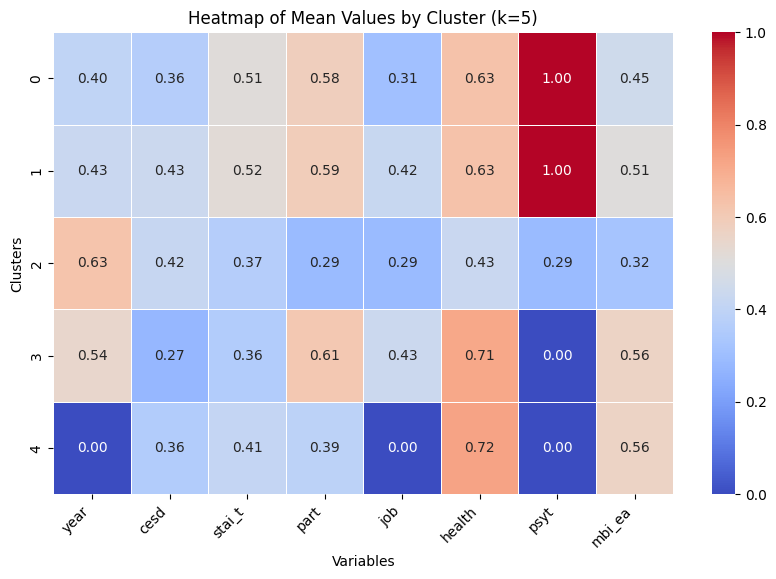

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster2(df_original, df_normalized, clusters, variables, k_def):
    # Afegir els labels dels clústers al DataFrame normalitzat
    df_norm_copy = df_normalized.copy()
    df_orig_copy = df_original.copy()
    
    # Assignar els clústers al DataFrame original i normalitzat
    for k, cluster_labels, _ in clusters:
        if k == k_def:
            df_norm_copy['Cluster'] = cluster_labels
            df_orig_copy['Cluster'] = cluster_labels
            break

    # Calcular la mitjana de les variables normals per clúster
    mean_values_real = df_orig_copy.groupby('Cluster')[variables].mean()

    # Calcular la mitjana de les variables normalitzades per clúster
    mean_values_norm = df_norm_copy.groupby('Cluster')[variables].mean()

    # Fer el heatmap utilitzant els valors normalitzats però mostrant els valors reals
    plt.figure(figsize=(10, 6))
    sns.heatmap(mean_values_norm, annot=mean_values_real, cmap='coolwarm', linewidths=0.5, fmt='.2f')

    plt.title(f'Heatmap of Mean Values by Cluster (k={k_def})')
    plt.xlabel('Variables')
    plt.ylabel('Clusters')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_cluster2(df_min_max_scaled, df_min_max_scaled, c2, ['year', 'cesd', 'stai_t', 'part', 'job', 'health', 'psyt', 'mbi_ea'], 5)
#plot_cluster2(df, df_max_scaled, c2, ['sex', 'year', 'cesd', 'stai_t', 'part', 'job', 'health', 'psyt', 'mbi_ea'], 5)
#plot_cluster2(df, df_max_scaled, c3, ['sex', 'year', 'cesd', 'stai_t', 'part', 'job', 'health', 'psyt', 'mbi_ea'], 5)


C:\Users\brntv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\brntv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


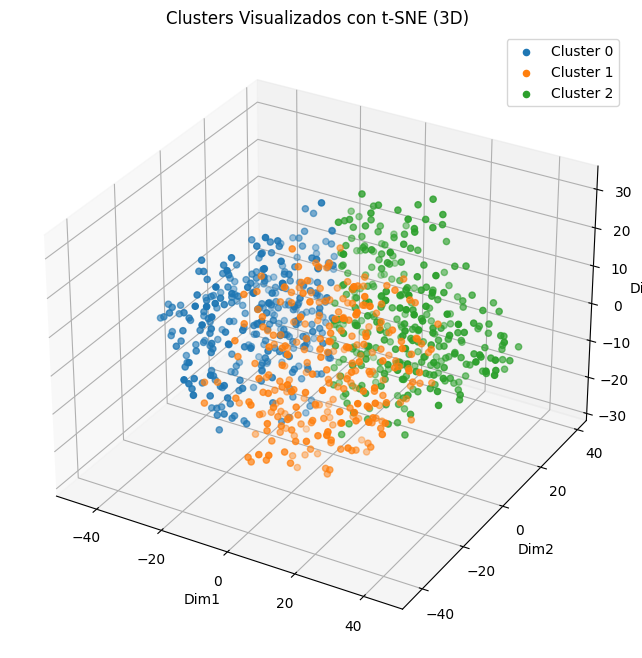

In [141]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Función para reducir dimensionalidad y mostrar clusters
def tsne_kmeans_clustering(df, n_clusters=3):
    # Estandarizar los datos
    # scaler = StandardScaler()
    # df_scaled = scaler.fit_transform(df)
    
    # Reducir a 3 dimensiones con t-SNE
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
    tsne_result = tsne.fit_transform(df)
    
    # Crear un DataFrame con las 3 dimensiones reducidas
    tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2', 'Dim3'])
    
    # Aplicar KMeans para agrupar
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    tsne_df['Cluster'] = kmeans.fit_predict(tsne_result)
    
    # Visualizar en 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster in range(n_clusters):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        ax.scatter(cluster_data['Dim1'], cluster_data['Dim2'], cluster_data['Dim3'], label=f'Cluster {cluster}')
    
    ax.set_title('Clusters Visualizados con t-SNE (3D)')
    ax.set_xlabel('Dim1')
    ax.set_ylabel('Dim2')
    ax.set_zlabel('Dim3')
    ax.legend()
    plt.show()
    
    return tsne_df

# Uso de la función
df = x2  # DataFrame original con las variables
tsne_clusters = tsne_kmeans_clustering(df, n_clusters=3)


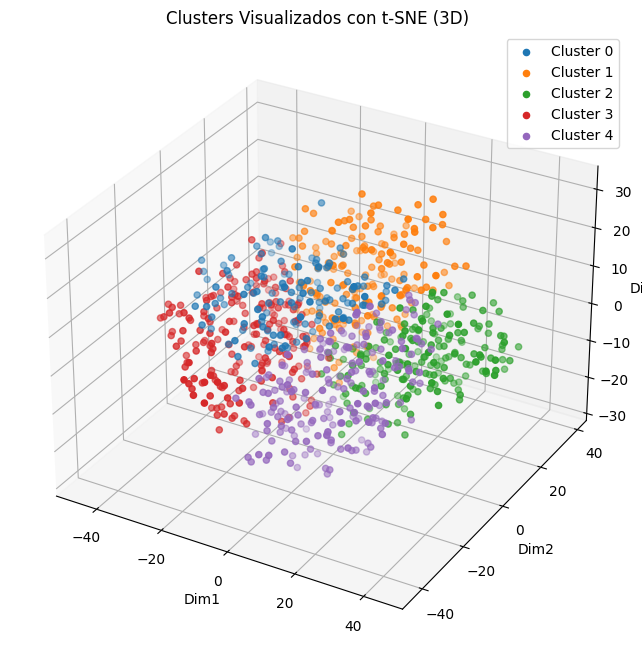

In [135]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Función para reducir dimensionalidad y mostrar clusters
def tsne_gmm_clustering(df, n_clusters=5):
    # Estandarizar los datos
    # scaler = StandardScaler()
    # df_scaled = scaler.fit_transform(df)
    
    # Reducir a 3 dimensiones con t-SNE
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
    tsne_result = tsne.fit_transform(df)
    
    # Crear un DataFrame con las 3 dimensiones reducidas
    tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2', 'Dim3'])
    
    # Aplicar GMM para agrupar
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    tsne_df['Cluster'] = gmm.fit_predict(tsne_result)
    
    # Visualizar en 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster in range(n_clusters):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        ax.scatter(cluster_data['Dim1'], cluster_data['Dim2'], cluster_data['Dim3'], label=f'Cluster {cluster}')
    
    ax.set_title('Clusters Visualizados con t-SNE (3D)')
    ax.set_xlabel('Dim1')
    ax.set_ylabel('Dim2')
    ax.set_zlabel('Dim3')
    ax.legend()
    plt.show()
    
    return tsne_df

# Uso de la función
df = x2  # DataFrame original con las variables
tsne_clusters = tsne_gmm_clustering(df, n_clusters=5)
